<a href="https://colab.research.google.com/github/higordevellard/MVP_01/blob/main/mvp_sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Disciplina: Sprint I: Análise de Dados e Boas Práticas
## Aluno: Higor Morais Devellard

In [1]:
# Configuração para não exibir os warnings dos pacotes que serão selecionados
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

## Carga do Dataset

Sendo um egenheiro eletricista, estou escolhendo um dataset que detalha o consumo de energia dos Estados Unidos entre os anos de 2001 - 2022. O Estudo será importante para conhecer melhor sobre a matriz energética deste país e o que esperar para os próximos anos.

In [2]:
# Localicazão do dataset

url_1 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/consumo_energia_eua_parte1.csv'
url_2 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/consumo_energia_eua_parte2.csv'

# labels dos atributos do dataset
labels_atributos = ['ID', 'Ano', 'Mês', 'Estado', 'Tipo_de_produção', 'Fonte_de_Energia', 'Geração(MWh)']

# Lê o arquivo 
dataset_p1 = pd.read_csv(url_1, names=labels_atributos, header=0, delimiter=',')
dataset_p2 = pd.read_csv(url_2, names=labels_atributos, header=0, delimiter=',')

A tabela foi importada pelo kaggle no seguinte endereço: https://www.kaggle.com/datasets/kevinmorgado/us-energy-generation-2001-2022 , onde a mesma foi elaborada por dados fornecidos pelo governo norte americano no endereço https://www.eia.gov/electricity/

Devido à limitação do kaggle para carregamento de datasets, foi considerado a divisão do dataset em duas partes.

## Análise Exploratória de Dados

###Informações Gerais e Estatísticas Descritivas

In [3]:
#Usando o método concat para concatenar as duas tabelas carregadas
dataset = pd.concat([dataset_p1, dataset_p2])

In [4]:
# Mostra as dimensões do dataset (Quantidade de linhas, quantidade de colunas)
dataset.shape

(496773, 7)

In [5]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496773 entries, 0 to 246773
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                496773 non-null  int64  
 1   Ano               496773 non-null  int64  
 2   Mês               496773 non-null  int64  
 3   Estado            496773 non-null  object 
 4   Tipo_de_produção  496773 non-null  object 
 5   Fonte_de_Energia  496773 non-null  object 
 6   Geração(MWh)      496773 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 30.3+ MB


**Observações importantes levantadas após os resultados da função info():** 

1)Todas as linhas e colunas foram devidamente carregadas.

2)Todas as 496773 linhas são não nulas.

3) as colunas "Mês" e "Ano" estão como tipo inteiro, inicialmente não há necessidade de alteração, mas à frente irei criar uma nova coluna tipo data no formado Mês/Ano.

4) as colunas 3,4 e 5 estão no formato esperado, assim como a coluna 6 que deverá retornar um valor decimal para a geração de energia. 


In [6]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,ID,Ano,Mês,Estado,Tipo_de_produção,Fonte_de_Energia,Geração(MWh)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0
5,5,2001,1,AK,Total Electric Power Industry,Total,590145.0
6,6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,18410.0
7,7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,64883.0
8,8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,305277.0
9,9,2001,1,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,104549.0


In [7]:
# Alterando os valores de geração de energia de Megawatt.hora para Terawatt.hora para melhor visualização dos gráficos.
dataset['Geração(TWh)'] = dataset['Geração(MWh)'] / (10 ** 6)

Obs: 

1 kWh = 1.000 Wh

1 MWh = 1.000.000 Wh

1 TWh = 1.000.000.000.000 Wh


In [8]:
# Como o dataset escolhido já vem com o índice, optei por utilizar o comando .drop da biblioteca pandas para ocultar a primeira coluna
dataset_1 = dataset.drop(['ID', 'Geração(MWh)'], axis=1)

In [9]:
dataset_1.head(10)

,Ano,Mês,Estado,Tipo_de_produção,Fonte_de_Energia,Geração(TWh)
0,2001,1,AK,Total Electric Power Industry,Coal,0.046903
1,2001,1,AK,Total Electric Power Industry,Petroleum,0.071085
2,2001,1,AK,Total Electric Power Industry,Natural Gas,0.367521
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,0.104549
4,2001,1,AK,Total Electric Power Industry,Wind,0.000087
5,2001,1,AK,Total Electric Power Industry,Total,0.590145
6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,0.018410
7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,0.064883
8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,0.305277
9,2001,1,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,0.104549


In [11]:
#Criando uma nova coluna concatenando as informações de Mês e Ano
dataset_1['Mês/Ano'] = dataset_1['Mês'].astype(str) + '/' + dataset_1['Ano'].astype(str)

In [12]:
#Formatando a nova coluna como data
dataset_1['Mês/Ano'] = pd.to_datetime(dataset_1['Mês/Ano'], format='%m/%Y')

In [13]:
dataset_1.head()

,Ano,Mês,Estado,Tipo_de_produção,Fonte_de_Energia,Geração(TWh),Mês/Ano
0,2001,1,AK,Total Electric Power Industry,Coal,0.046903,2001-01-01
1,2001,1,AK,Total Electric Power Industry,Petroleum,0.071085,2001-01-01
2,2001,1,AK,Total Electric Power Industry,Natural Gas,0.367521,2001-01-01
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,0.104549,2001-01-01
4,2001,1,AK,Total Electric Power Industry,Wind,0.000087,2001-01-01


**Criação do gráfico de energia total gerada nos EUA (2001-2022) em TWh.**

In [14]:
dataset_2 = dataset_1['Fonte_de_Energia'] == 'Total'

Primeiramente, preciso selecionar apenas as linhas em que a fonte de energia seja igual a "Total", ou seja, esteja somando todos os tipos de fonte energia.

In [15]:
dataset_3 = dataset_1['Estado'] == 'US-TOTAL'

O segundo passo será filtrar apenas os estados 'US-TOTAL' que representa a geração somada dos estados.

In [16]:
dataset_4 = dataset_1[dataset_2 & dataset_3]

In [17]:
#Agrupar as colunas de Mês/ano com o estado para saber o valor gerado de energia.
dataset_5 = dataset_4.groupby(['Mês/Ano', 'Estado'])['Geração(TWh)'].sum().reset_index()

In [18]:
dataset_5.head()

,Mês/Ano,Estado,Geração(TWh)
0,2001-01-01,US-TOTAL,664.986320
1,2001-02-01,US-TOTAL,565.880396
2,2001-03-01,US-TOTAL,601.413088
3,2001-04-01,US-TOTAL,556.157742
4,2001-05-01,US-TOTAL,600.983242


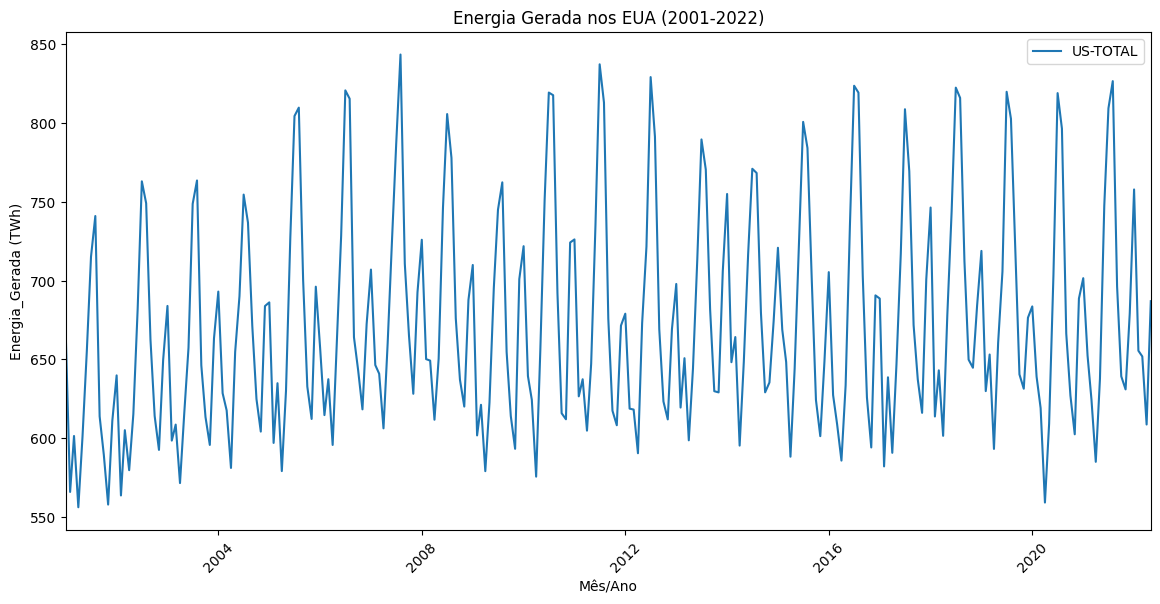

In [24]:
#Definindo a dimensão para a figura que será criada 
fig, ax = plt.subplots(figsize=(14,6))

#O Loop for será usado para percorrer todos os dados
for estado in dataset_5['Estado'].unique():
    df_grafico = dataset_5[dataset_5['Estado'] == estado]
    ax.plot(df_grafico['Mês/Ano'], df_grafico['Geração(TWh)'], label=estado)

# Adicione legendas e títulos
ax.legend()
ax.set_xlabel('Mês/Ano')
ax.set_ylabel('Energia_Gerada (TWh)')
ax.set_title('Energia Gerada nos EUA (2001-2022)')

# Define o limite inferior do eixo x como o primeiro valor obtido
x_min = dataset_5['Mês/Ano'].min()
x_max = dataset_5['Mês/Ano'].max()
ax.set_xlim(left=x_min, right=x_max)

plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.05)